<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [104]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values()) + 1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

num_categories = len(set(list(y_train) + list(y_test)))
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_categories, activation='softmax'))

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [105]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size,
                            verbose=False)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
8982/8982 [==============================] - 55s 6ms/sample - loss: 2.3618 - accuracy: 0.4031 - val_loss: 2.0050 - val_accuracy: 0.4951
Test score: 2.0050258735196462
Test accuracy: 0.4951024


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

The original data are of varying length, but our model needs a consistent number of input features. Setting `maxlen = 200` caps our feature number to 200, but some inputs may have less than 200 items. The `pad_sequences` method will truncate inputs to 200 items and add zeros as a default value to to any inputs that fall short of 200 items. This creates inputs that all have the same length.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Traditional RNNs experience exponentially diminishing memory. LSTM adds a memory cell that can retain information from past information longer than an RNN. This makes it well-suited for sequential data such as time-series data and language text.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Identifying hand-written digits. Classifying blocks of text. Prediciting the next items in a sequence, such as text completion. In all of these examples the location of each datum in relation to other data is important and can be leveraged with RNN's ability to retain information.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [35]:
!pip install google_images_download

     |████████████████████████████████| 911kB 21.0MB/s eta 0:00:01
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=16275 sha256=e118140b741b76044ca4371bfd91fe485dbe79f1093dc27d0b893834377185d3
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download
You should consider upgrading via the 'pip install --upgrade pip' command.


In [46]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 8, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: http://brookesitton.weebly.com/uploads/5/5/3/4/55348493/5415787_orig.gif
URLError on an image...trying next one... Err

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [48]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`
    function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    model = ResNet50(weights='imagenet')
    features = model.predict(img)
    results = decode_predictions(features, top=5)[0]
    print(results)
    for entry in results:
        if entry[1] in ['bullfrog', 'tree frog', 'tailed frog']:
            return entry[2]       
    return 0

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [49]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

In [60]:
imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

[('n04243546', 'slot', 0.9316122), ('n04476259', 'tray', 0.030293096), ('n03908618', 'pencil_box', 0.011190471), ('n03291819', 'envelope', 0.0034053158), ('n03485794', 'handkerchief', 0.002401681)]
[('n01443537', 'goldfish', 0.878028), ('n01631663', 'eft', 0.04291887), ('n02536864', 'coho', 0.03355649), ('n01630670', 'common_newt', 0.018527554), ('n01980166', 'fiddler_crab', 0.007383294)]
[('n03485794', 'handkerchief', 0.93647337), ('n02834397', 'bib', 0.016396338), ('n04209239', 'shower_curtain', 0.010259705), ('n03291819', 'envelope', 0.0073148827), ('n02730930', 'apron', 0.0038500617)]
[('n02116738', 'African_hunting_dog', 0.6289211), ('n02117135', 'hyena', 0.13972592), ('n02105162', 'malinois', 0.08844591), ('n02114712', 'red_wolf', 0.06904722), ('n02091467', 'Norwegian_elkhound', 0.021634124)]
[('n02442845', 'mink', 0.3160429), ('n02363005', 'beaver', 0.25251913), ('n02361337', 'marmot', 0.20913957), ('n02441942', 'weasel', 0.0977596), ('n02443114', 'polecat', 0.056790452)]
[('n03

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


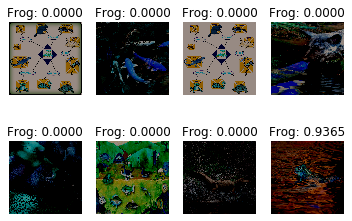

In [59]:
f, axarr = plt.subplots(2,4)

for x,y in [(0,0), (0,1), (0,2), (0,3), (1,0), (1,1), (1,2), (1,3)]:  
    axarr[x,y].imshow(np.squeeze(imgs[4*x + y], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[4*x + y]:.4f}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ Information retrieval and comparison is a good use case for an autoencoder. Encoding data will reduce the feature size and decrease the noise, allowing for more efficient comparisons.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

I have a combination of skepticism and curiosity. I want to know how how models work and how to improve them. Improving something means recognizing it's strengths and weaknesses, and then improving weaknesses where possible and guarding against use cases that would expose the weaknesses where improving is not possible or practical. 

- What area of Data Science would you most like to learn more about, and why?

The ramifications of what we chose to measure interests me, as well as how we evaluate the validity and usefulness of models. The confusion of what we know and don't know in areas like medical research seems like an opportunity for data science techniques to prove beneficial.

- Where do you think Data Science will be in 5 years?

The tooling will be better. More people will have less friction tinkering with data science. This will lead to a lot of bad data science, but increase the odds that someone will stumble over an unexpected way to make significant gains. Barring any breakthroughs, incremental improvements will continue, and bigger systems will incorporate more and more moving parts made up of what we can already achieve.

- What are the threats posed by AI to our society?

Relying on black box models that are not checked for biases is probably a bigger issue currently than is widely recognized. We don't know all the ways these models are currently being used. 

- How do you think we can counteract those threats? 

Demand transparency and disclosure from governments and businesses. Avoid those dealing with those entities that do not provide evidence that their models are not unfairly biased.

- Do you think achieving General Artifical Intelligence is ever possible?

Probably not, at least not within any reasonable time horizon, but then I have a pretty high bar for what qualifies as General Artificial Intelligence. I think that almost autonomous systems will continue to grow more sophisticacted, powerful, and, hopefully, beneficial.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [61]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")